In [2]:
import tensorflow as tf
from tensorflow import keras

# 导入fashion mnist数据集
fashion_mnist = keras.datasets.fashion_mnist
# 加载数据
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [3]:
print(f"train_images.shape: {train_images.shape}")
print(f"test_images.shape: {test_images.shape}")
print(f"train_labels.shape: {train_labels.shape}")
print(f"test_labels.shape: {test_labels.shape}")

print(f"train_images[0]: {train_images[0]}")
print(f"train_labels[0]: {train_labels[0]}")

train_images.shape: (60000, 28, 28)
test_images.shape: (10000, 28, 28)
train_labels.shape: (60000,)
test_labels.shape: (10000,)
train_images[0]: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   

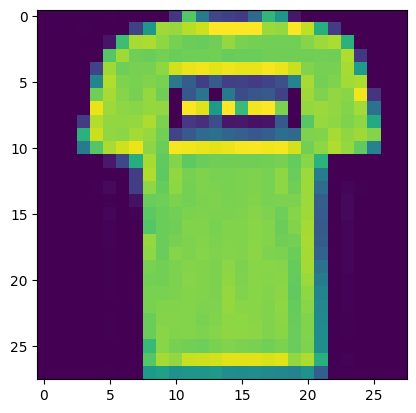

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_images[1])

In [ ]:
# 构造神经元
model = keras.Sequential([
    # Flatten层将二维的输入数据转换为一维的输入数据
    keras.layers.Flatten(input_shape=(28, 28)),
    # 隐藏层 256个神经元 每个神经元接受28*28=784个输入 激活函数为relu
    # 神经元的数量决定了模型的复杂度 
    keras.layers.Dense(256, activation='relu'),
    # 输出层 输出10个类别
    keras.layers.Dense(10, activation='softmax')
]) 